In [1]:
from Mobilenet import MobileNet
import torch
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
# import importlib

Hello from the MahmoudNet community


In [2]:
trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [3]:
train_set = torchvision.datasets.ImageFolder('/home/mahmoud-sayed/Desktop/Dataset/cats vs dogs/training_set/training_set', transform=trans)
test_set  = torchvision.datasets.ImageFolder('/home/mahmoud-sayed/Desktop/Dataset/cats vs dogs/test_set/test_set', transform=trans)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_set, batch_size=128)


In [4]:
train_set[5001][1]

1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.92156863].


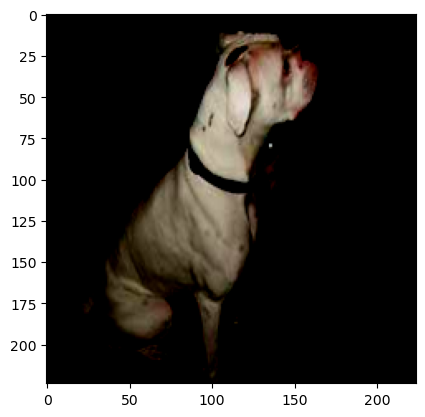

In [5]:
plt.imshow(train_set[5001][0].permute(1,2,0))

In [6]:
iter = train_loader._get_iterator()

In [7]:
x = iter._next_data()[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


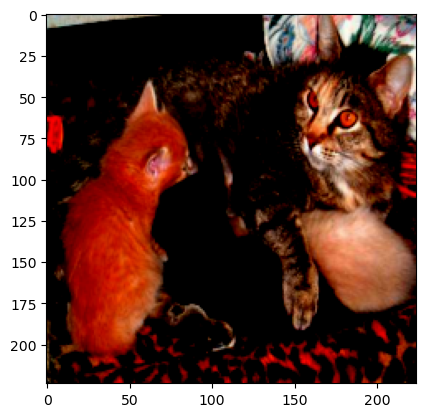

In [8]:
plt.imshow(x[0].permute(1,2,0))

In [9]:
def compute_val_accuracy(model, test_loader, threshold=0.5, device='cpu'):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images).squeeze()  # Squeeze in case output shape is [batch_size, 1]
            predictions = (outputs > threshold).float()
            
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    
    accuracy = correct / total
    return accuracy


In [10]:
model = MobileNet(3, 0.75, 192)

In [14]:
learning_rate = 0.01
optimizer = torch.optim .RMSprop(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()
EPOCHS = 20



for i in range(EPOCHS):
    losses = []
    model.train()
    for j, item in enumerate(train_loader, 0):
        optimizer.zero_grad()
        images, labels = item
        outputs = model(images)
        outputs = outputs.squeeze(1)
        # print(outputs)
        # print(labels)
        labels = labels.float()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    validation_accuracy = compute_val_accuracy(model, test_loader, 0.5)
    print(f"loss: {sum(losses)/len(losses)}")


KeyboardInterrupt: 